## 1 Requirements ✅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

parquet_path = './Datasets/Parquet Files'

### Importe und Vorbereitung Datasets

In [2]:
coef_df_nonzero = pd.read_parquet(f"{parquet_path}/feature_koeffizienten.parquet")
coef_df_nonzero['Feature'] = coef_df_nonzero['Feature'].apply(lambda x: x.split("__", 1)[-1] if "__" in x else x)
# coef_df_nonzero.head()

In [3]:
elastic_net_input = pd.read_parquet(f"{parquet_path}/elastic_net_input.parquet")
elastic_net_input.head(1)

,Bevölkerung__Bevölkerungsdichte (EW je qkm),Unternehmen__AB in der IKT je 1.000 EW im erwerbsfähigen Alter,Demografie__Personen mit dem Familienstand Geschieden / eingetragene Lebenspartnerschaft aufgehoben,Industrie__Bruttoentgelte je Beschäftigten,Erwerbstätigkeit_und_Arbeitslosigkeit__Anteil Arbeitslose 15-24 Jahre an Arbeitslosen insgesamt,Bildung__Anteil betreute Kinder 3-5 Jahre in Tageseinrichtungen am 01.03.,Demografie__Personen in der Altersklasse 16 - 18 Jahre,Erwerbstätigkeit_und_Arbeitslosigkeit__Anteil der ausl. Arbeitslosen an Arbeitslosen insgesamt,Demografie__Personen in der Altersklasse 0 - 3 Jahre,Bildung__Anteil betreute Kinder 0-2 Jahre in Tagespflege am 01.03.,...,Haushalte__Haushalte mit vier Personen (Anzahl),Erwerbstätigkeit_und_Arbeitslosigkeit__Anteil Langzeitarbeitslose an Arbeitslosen insgesamt,"Unternehmen__AB in Kunst, Unterh. und Erholung je 1.000 EW im erwerbsf. Alter",Bevoelkerung__Einwohnerzahl,Bevölkerung__Wanderungssaldo je 10.000 EW,Unternehmen__AB insgesamt je 1.000 EW im erwerbsfähigen Alter,Verkehr__Pkw-Bestand je 1.000 EW am 01.01.,Verkehr__Getötete bei Straßenverkehrsunfällen je 100.000 EW,Haushalte__Haushalte mit fünf Personen (Anzahl),Bevölkerung__Einbürgerungsquote
0,1639.9,68.2,18443.0,58.4,7.4,95.8,6600.0,42.8,6507.0,8.8,...,9538.0,42.2,8.3,261178.0,52.3,860.8,439.9,1.1,3405.0,5.555556e+09


Die Kategorien der Spalten in Elastic_net_input werden noch entfernt (alles was vor dem doppelten '_' kommt).

In [4]:
elastic_net_input = pd.read_parquet(f"{parquet_path}/elastic_net_input.parquet")

def clean_feature_name(name):
    return name.split("__", 1)[-1] if "__" in name else name

elastic_net_input.columns = [clean_feature_name(col) for col in elastic_net_input.columns]
elastic_net_input.head(1)

,Bevölkerungsdichte (EW je qkm),AB in der IKT je 1.000 EW im erwerbsfähigen Alter,Personen mit dem Familienstand Geschieden / eingetragene Lebenspartnerschaft aufgehoben,Bruttoentgelte je Beschäftigten,Anteil Arbeitslose 15-24 Jahre an Arbeitslosen insgesamt,Anteil betreute Kinder 3-5 Jahre in Tageseinrichtungen am 01.03.,Personen in der Altersklasse 16 - 18 Jahre,Anteil der ausl. Arbeitslosen an Arbeitslosen insgesamt,Personen in der Altersklasse 0 - 3 Jahre,Anteil betreute Kinder 0-2 Jahre in Tagespflege am 01.03.,...,Haushalte mit vier Personen (Anzahl),Anteil Langzeitarbeitslose an Arbeitslosen insgesamt,"AB in Kunst, Unterh. und Erholung je 1.000 EW im erwerbsf. Alter",Einwohnerzahl,Wanderungssaldo je 10.000 EW,AB insgesamt je 1.000 EW im erwerbsfähigen Alter,Pkw-Bestand je 1.000 EW am 01.01.,Getötete bei Straßenverkehrsunfällen je 100.000 EW,Haushalte mit fünf Personen (Anzahl),Einbürgerungsquote
0,1639.9,68.2,18443.0,58.4,7.4,95.8,6600.0,42.8,6507.0,8.8,...,9538.0,42.2,8.3,261178.0,52.3,860.8,439.9,1.1,3405.0,5.555556e+09


Hier werden die Top Features mit negativen bzw. positiven Koeffizienten aus dem Elastic Net als top_features zusammengeführt.

## 2 Korrelationsmatrix

Hier wird die Korrelationsmatrix genutzt, um Features mit hoher Korrelationen zu entfernen. Das soll dabei helfen die Ergebnisse besser zu interpretieren.

#### All features --> Das nutzen

In [5]:
all_feature_names = coef_df_nonzero["Feature"].tolist()

# Wir nehmen nur die Spalten aus elastic_net_input, die in top_feature_names stehen
top_df = elastic_net_input[all_feature_names]
top_df.head(1)

,Gewerbeanmeldungen je 10.000 EW,Personen mit dem Familienstand Ohne Angabe,Ganztagsbetreuung 3 bis 5 Jahre am 01.03.,Ganztagsbetreuung 0 bis 2 Jahre am 01.03.,Anteil Arbeitslose 55-64 Jahre an Arbeitslosen insgesamt,Anteil neue Wohngebäude mit 1 oder 2 Wohnungen,Anteil Schulabgänger/-innen mit allgem. Hochschulreife,Anteil Schulabgänger/-innen ohne Hauptschulabschluss,AB in der Wasserversorgung je 1.000 EW im erwerbsfähigen Alter,AB im Baugewerbe je 1.000 EW im erwerbsfähigen Alter,...,Personen mit ausländischer Staatsangehörigkeit,AB in Verkehr und Lagerei je 1.000 EW im erwerbsfähigen Alter,Haushalte mit Seniorinnen/Senioren und Jüngeren (Anzahl),Anteil Empfänger/-innen Arbeitslosengeld II bis 24 Jahre,Betreuungsquote 0 bis 2 Jahre am 01.03.,Quote erwerbsfähige SGB II-Leistungsberechtigte Frauen,Eingetragene Lebenspartnerschaften (Anzahl Haushalte),Personen mit einseitiger Einwanderungsgeschichte,Betreuungsquote 3 bis 5 Jahre am 01.03.,Haushalte mit sechs Personen (Anzahl)
0,68.3,4311.0,75.6,27.2,21.5,81.8,49.3,2.7,5.555556e+09,21.8,...,54255.0,31.5,8035.0,7.3,36.9,10.1,81.0,4829.0,96.3,1850.0


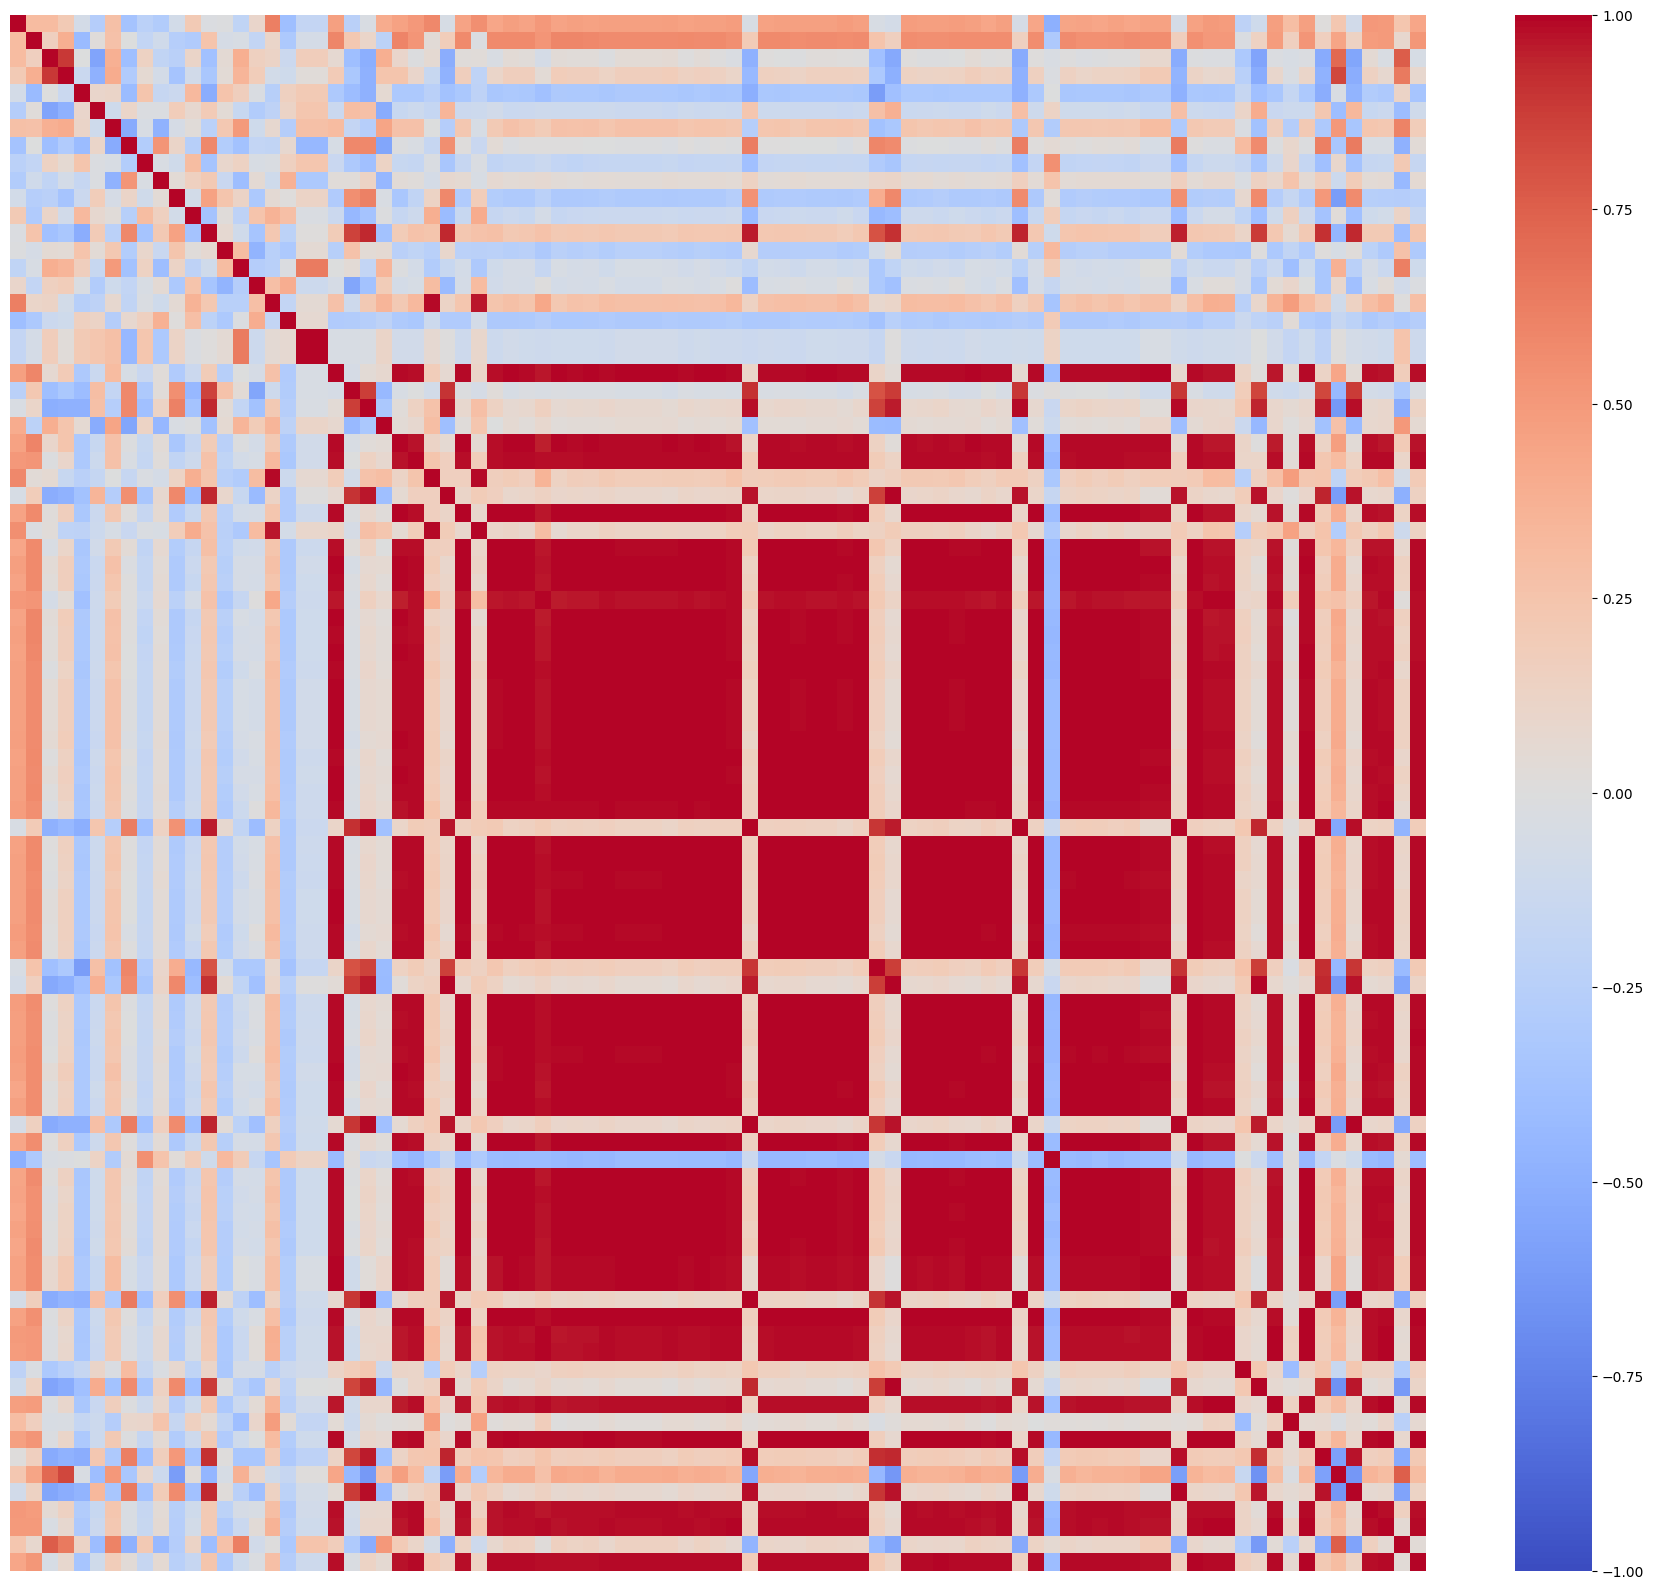

In [ ]:
corr_matrix = top_df.corr(method="pearson")

plt.figure(figsize=(18, 16))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    cbar=True,
    xticklabels=False,
    yticklabels=False
)
plt.title("Korrelationsmatrix aller 89 Prädiktoren (ohne Achsenbeschriftung)", fontsize=18)
plt.tight_layout()
plt.show()

Nun werden alle mit hoher Korrelation von über 0,7 entfernt

In [21]:
import numpy as np

# Schritt 1: Korrelationsmatrix berechnen (Absolutwerte)
corr_matrix = top_df.corr().abs()

# Schritt 2: Nur obere Dreiecksmatrix betrachten (keine Dopplungen, keine Diagonale)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Schritt 3: Spalten mit hoher Korrelation identifizieren
threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Schritt 4: Ergebnis-DF ohne diese Spalten
top_df_pruned = top_df.drop(columns=to_drop)

# Schritt 5: Ausgabe
print(f"{len(to_drop)} von {top_df.shape[1]} Spalten entfernt, weil sie mit mindestens einer anderen Spalte |ρ| > {threshold} hatten.")
print("Entfernte Spalten:")
print(to_drop)

print("\nÜbrig gebliebene Spalten:")
print(top_df_pruned.columns.tolist())


66 von 89 Spalten entfernt, weil sie mit mindestens einer anderen Spalte |ρ| > 0.7 hatten.
Entfernte Spalten:
['Ganztagsbetreuung 0 bis 2 Jahre am 01.03.', 'Einbürgerungsquote', 'Arbeitslosenquote Ausländerinnen und Ausländer', 'Anteil Kinder mit Bezug von Sozialgeld', 'Nichteheliche Lebensgemeinschaften (Anzahl Haushalte)', 'Personen in schulischer Ausbildung OS insgesamt', 'Grundsicherungsquote ab Altersgrenze', 'Arbeitslosenquote Männer', 'Paare ohne Kind (Anzahl Haushalte)', 'Grundsicherungsquote Frauen ab Altersgrenze', 'Personen mit dem Familienstand Verwitwet / eingetragene(r) Lebenspartner(in) verstorben', 'Haushalte ohne Seniorinnen/Senioren (Anzahl)', 'Haushalte mit zwei Personen (Anzahl)', 'Nachkommen von Eingewanderten', 'Personen ohne Einwanderungsgeschichte', 'Alleinerziehende Väter (Anzahl Haushalte)', 'Personen mit deutscher Staatsangehörigkeit', 'Personen in der Altersklasse 16 - 18 Jahre', 'Einpersonenhaushalt (Singlehaushalt) (Anzahl)', 'Haushalte mit einer Person (A

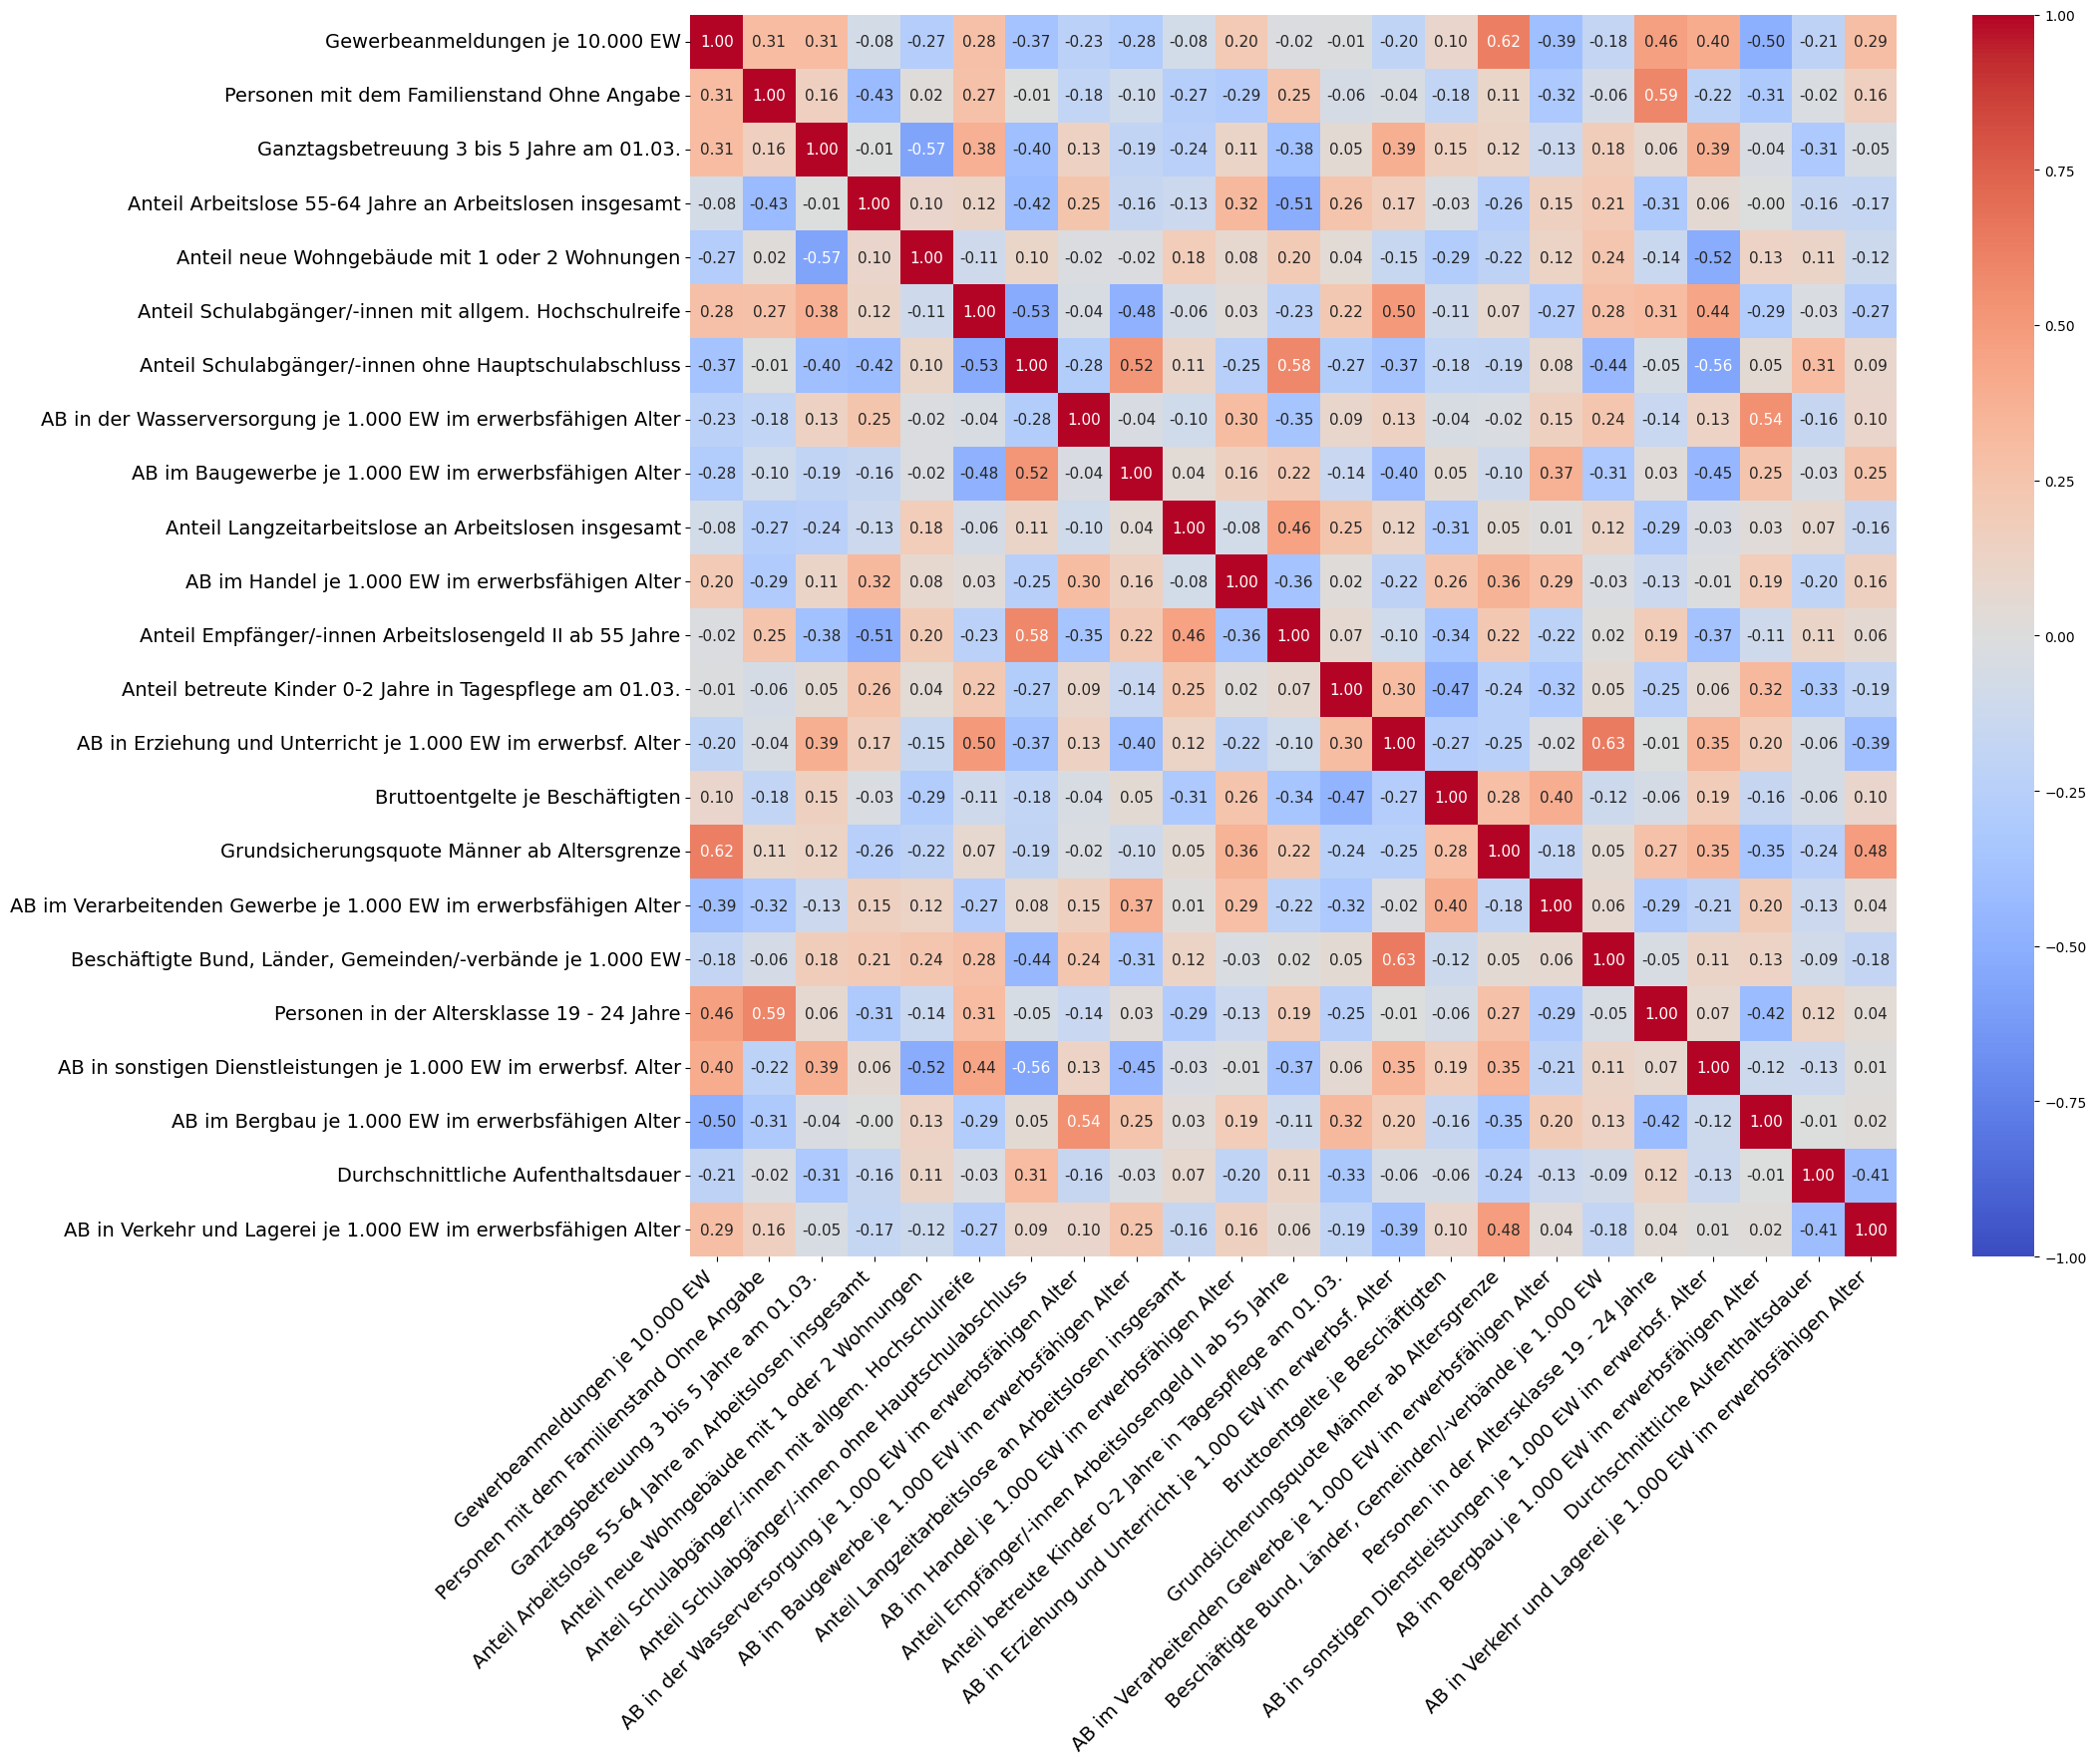

In [17]:
corr_matrix = top_df_pruned.corr(method="pearson")

plt.figure(figsize=(len(all_feature_names) * 0.25, len(all_feature_names) * 0.2))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    annot_kws={"size": 11},
    fmt=".2f"
)
plt.xticks(fontsize=14, rotation=45, ha="right")
plt.yticks(fontsize=14)
plt.title("")
plt.tight_layout()
plt.show()


In [22]:
# 1️⃣ Extrahiere die ursprünglichen Feature-Namen aus coef_df_nonzero
top_feature_names = coef_df_nonzero["Feature"].tolist()

# 2️⃣ Lege die Spalten fest, die durch top_df_pruned übriggeblieben sind
remaining_names = top_df_pruned.columns.tolist()

# 3️⃣ Filtere top_features auf diese übrig gebliebenen Features
top_features_pruned = coef_df_nonzero[coef_df_nonzero["Feature"].isin(remaining_names)].reset_index(drop=True)

# 4️⃣ Ausgabe: Anzahl & Liste
print(f"{len(top_features_pruned)} von {len(coef_df_nonzero)} ursprünglichen Top-Features sind nach dem Korrelation-Filter geblieben.")
print("Übrig gebliebene Top-Features:")
print(top_features_pruned)


23 von 89 ursprünglichen Top-Features sind nach dem Korrelation-Filter geblieben.
Übrig gebliebene Top-Features:
                                              Feature  Koeffizient
0                     Gewerbeanmeldungen je 10.000 EW    -3.148784
1          Personen mit dem Familienstand Ohne Angabe    -2.980886
2           Ganztagsbetreuung 3 bis 5 Jahre am 01.03.    -1.802009
3   Anteil Arbeitslose 55-64 Jahre an Arbeitslosen...     1.548044
4      Anteil neue Wohngebäude mit 1 oder 2 Wohnungen     1.477011
5   Anteil Schulabgänger/-innen mit allgem. Hochsc...    -1.151081
6   Anteil Schulabgänger/-innen ohne Hauptschulabs...     1.138346
7   AB in der Wasserversorgung je 1.000 EW im erwe...     1.069852
8   AB im Baugewerbe je 1.000 EW im erwerbsfähigen...     0.991725
9   Anteil Langzeitarbeitslose an Arbeitslosen ins...    -0.935129
10   AB im Handel je 1.000 EW im erwerbsfähigen Alter     0.796216
11  Anteil Empfänger/-innen Arbeitslosengeld II ab...    -0.754565
12  Anteil betre

In [23]:
top_features_pruned.to_parquet(f"{parquet_path}/auswertung_top_df_pruned.parquet")

## 3 Auswertung

In [24]:
top_features = pd.read_parquet(f"{parquet_path}/auswertung_top_df_pruned.parquet")

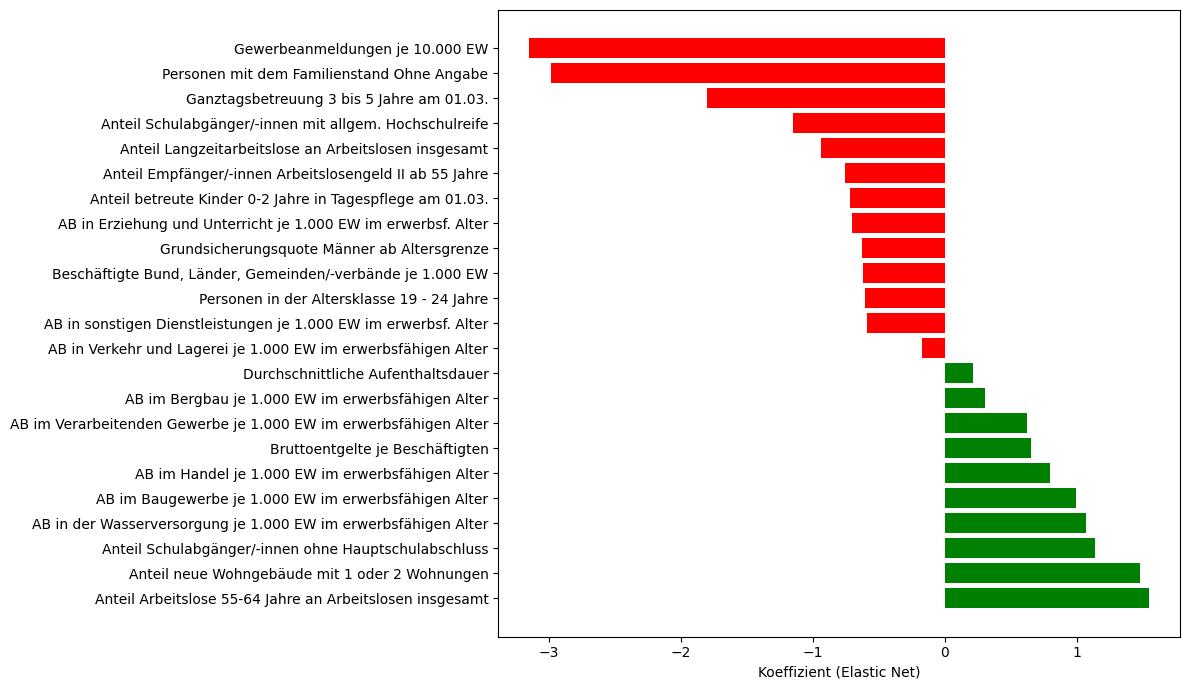

In [27]:
# Sortiere so, dass die Features mit dem höchsten positiven Koeffizienten oben stehen
top_features_sorted = top_features.sort_values('Koeffizient', ascending=False)

plt.figure(figsize=(12, 7))
plt.barh(
    top_features_sorted['Feature'],
    top_features_sorted['Koeffizient'],
    color=['green' if k > 0 else 'red' for k in top_features_sorted['Koeffizient']]
)
plt.title("")
plt.xlabel("Koeffizient (Elastic Net)")
plt.tight_layout()
plt.show()
